In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [32]:
df=pd.read_csv("/content/car dataset.csv")

In [33]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [35]:
df=df.dropna()

In [36]:
df.describe()

,Odometer (KM),Doors,Price
count,773.000000,773.000000,773.000000
mean,131229.655886,4.010349,16189.523933
std,69482.980143,0.384137,8540.820948
min,10148.000000,3.000000,2796.000000
25%,71283.000000,4.000000,9785.000000
50%,130494.000000,4.000000,14588.000000
75%,193006.000000,4.000000,20893.000000
max,249860.000000,5.000000,52458.000000


# Data Visualization

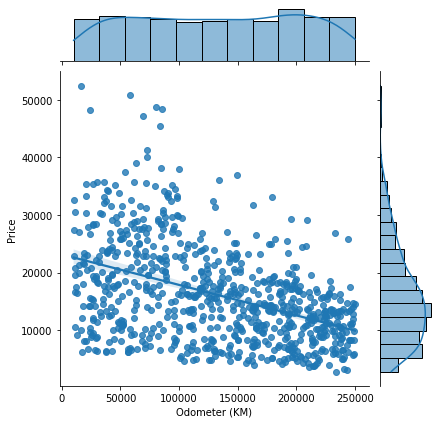

In [37]:
sns.jointplot(x=df['Odometer (KM)'], y=df['Price'], data=df, kind='reg')

# Linear Regression using normal equaltions

In [38]:
x=df["Odometer (KM)"]
y=df["Price"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [39]:
# calculate co-efficient
def theta_calc(x_train, y_train): 
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)

    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)

    return theta

In [40]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [41]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [42]:
def rsq(prediction, y_test):

    total_data = len(prediction)
    
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

In [43]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model',slope)

Intercept of the model [22946.94241182]
Slope of the model [-0.05222222]


In [44]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

In [45]:
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.20115050811192803


In [46]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['Price']
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)

Mean squared error of the model 57851649.658958495


In [47]:
error = (np.sum((prediction - y_test)**2))/len(prediction)
error

57851649.658958495

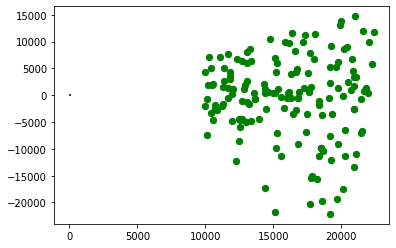

In [48]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)

# Using Scikit-Learn

In [49]:
cls = LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [50]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[-0.05222222]]


In [51]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [22946.94241182]


In [52]:
print('Mean Square Error', mean_squared_error(y_test, prediction))

Mean Square Error 57851649.658958495


In [53]:
print('Model R^2 Square value', r2_score(y_test, prediction))

Model R^2 Square value 0.20115050811192803


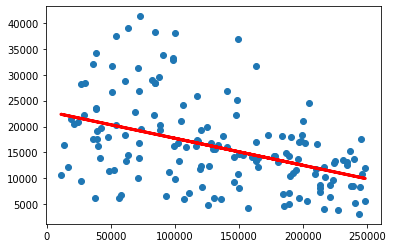

In [54]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)

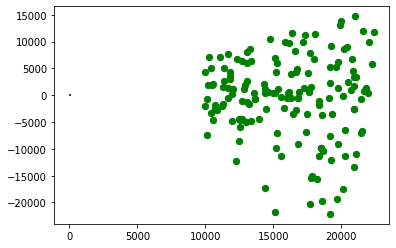

In [55]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)